In [ ]:
%pip install matplotlib numpy openvino-dev

Image Classification Example


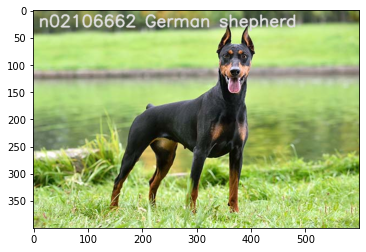

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from openvino.runtime import Core

# must download and convert model using openvino omz tools first

print("Image Classification Example")

ie = Core()
model = ie.read_model(model="models/public/mobilenet-v3-small-1.0-224-tf/FP16/mobilenet-v3-small-1.0-224-tf.xml")
compiled_model = ie.compile_model(model=model, device_name="CPU")
output_layer = compiled_model.output(0)

# Load Image
#image = cv2.cvtColor(cv2.imread(filename="data/dog.jpg"), code=cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(cv2.imread(filename="data/cat.jpg"), code=cv2.COLOR_BGR2RGB)
input_image = cv2.resize(src=image, dsize=(224, 224))
input_image = np.expand_dims(input_image, axis=0)

result_infer = compiled_model([input_image])[output_layer]
result_index = np.argmax(result_infer)
# Convert the inference result to a class name.
imagenet_classes = open("utils/imagenet_2012.txt").read().splitlines()

# The model description states that for this model, class 0 is a background.
# Therefore, a background must be added at the beginning of imagenet_classes.
imagenet_classes = ['background'] + imagenet_classes

font = cv2.FONT_HERSHEY_SIMPLEX
label = imagenet_classes[result_index].split(',')[0]
cv2.putText(image,label,(10,30), font, 1, (224, 224, 224), 2, cv2.LINE_AA)

#print(imagenet_classes[result_index])
plt.imshow(image)
plt.show()